In [1]:
from operator import itemgetter
import networkx as nx
import wikipedia
import matplotlib.pyplot as plt

In [4]:
def graphBuilder(pageTitle):
    SEED = pageTitle.title()
    STOPS = ("International Standard Serial Number",
            "International Standard Book Number",
            "National Diet Library",
            "International Standard Name Identifier",
            "International Standard Book Number (Identifier)",
            "Pubmed Identifier",
            "Pubmed Central",
            "Digital Object Identifier",
            "Arxiv",
            "Proc Natl Acad Sci Usa",
            "Bibcode",
            "Library Of Congress Control Number",
            "Jstor",
            "Doi (Identifier)",
            "Isbn (Identifier)",
            "Pmid (Identifier)",
            "Arxiv (Identifier)",
            "Bibcode (Identifier)")

    todo_lst = [(0, SEED)]  # The SEED is in layer 0
    todo_set = set(SEED)  # The SEED itself
    done_set = set()  # Nothing is done yet

    g = nx.DiGraph()
    layer, page = todo_lst[0]

    while layer < 2:
        # Remove the name page of the current page from the todo_lst,
        # and add it to the set of processed pages.
        # If the script encounters this page again, it will skip over it.
        del todo_lst[0]
        done_set.add(page)

        # Show progress
        #print(layer, page)

        # Attempt to download the selected page.
        try:
            wiki = wikipedia.page(page)  # Specify language as 'en' for English
        except wikipedia.exceptions.DisambiguationError as e:
            #print(f"Ambiguous page: {page}. Skipping.")
            layer, page = todo_lst[0]
            continue
        except:
            #print("Could not load", page)
            layer, page = todo_lst[0]
            continue

        for link in wiki.links:
            link = link.title()
            if link not in STOPS and not link.startswith("List Of"):
                if link not in todo_set and link not in done_set:
                    todo_lst.append((layer + 1, link))
                    todo_set.add(link)
                g.add_edge(page, link)
        layer, page = todo_lst[0]

    print("{} nodes, {} edges".format(len(g), nx.number_of_edges(g)))
    return g

In [5]:
graphAlbion = graphBuilder("Albion Online")

5347 nodes, 6376 edges


In [6]:
graphOutlast = graphBuilder("Outlast 2")

16105 nodes, 20924 edges


In [7]:
graphAge = graphBuilder("Alan Wake 2")

15382 nodes, 22194 edges


In [8]:
graphCities = graphBuilder("Cities: Skylines II")

11554 nodes, 17158 edges


In [9]:
composeAlbionOutlast = nx.compose(graphAlbion, graphOutlast)
composeAgeCities = nx.compose(graphAge, graphCities)

composeAll = nx.compose(composeAlbionOutlast, composeAgeCities)

print("{} nodes, {} edges".format(len(composeAll), nx.number_of_edges(composeAll)))

34700 nodes, 54734 edges


In [10]:
original = composeAll.copy()

In [11]:
composeAll.remove_edges_from(nx.selfloop_edges(composeAll))

# identify duplicates like that: 'network' and 'networks'
duplicates = [(node, node + "s")
              for node in composeAll if node + "s" in composeAll]

for dup in duplicates:
  # *dup is a technique named 'unpacking'
  composeAll = nx.contracted_nodes(composeAll, *dup, self_loops=False)

print(duplicates)

[('Video Game Genre', 'Video Game Genres'), ('Video Game Publisher', 'Video Game Publishers'), ('Bicycle', 'Bicycles'), ('Mobile App', 'Mobile Apps'), ('Personal Computer', 'Personal Computers'), ('Racing Game', 'Racing Games'), ('Smartphone', 'Smartphones'), ('Tablet Computer', 'Tablet Computers'), ('Video Game Console', 'Video Game Consoles'), ('Information System', 'Information Systems'), ('Operating System', 'Operating Systems'), ('Video Game', 'Video Games'), ('Demon', 'Demons'), ('Gremlin', 'Gremlins'), ('Horror Film', 'Horror Films'), ('Metaphor', 'Metaphors'), ('Protagonist', 'Protagonists'), ('Pulp Magazine', 'Pulp Magazines'), ('Sequel', 'Sequels'), ('World Fantasy Award', 'World Fantasy Awards'), ('Downloadable Content', 'Downloadable Contents'), ('Experience Point', 'Experience Points'), ('Micropayment', 'Micropayments'), ('Microtransaction', 'Microtransactions'), ('Mobile Game', 'Mobile Games'), ('Action-Adventure Game', 'Action-Adventure Games'), ('Action Role-Playing Gam

In [12]:
duplicates = [(x, y) for x, y in
              [(node, node.replace("-", " ")) for node in composeAll]
                if x != y and y in composeAll]
print(duplicates)


[('In-Car Entertainment', 'In Car Entertainment'), ('Long-Term Support', 'Long Term Support'), ('Open-Source Software', 'Open Source Software'), ('Random-Access Memory', 'Random Access Memory'), ('Xda-Developers', 'Xda Developers'), ('Tech-Noir', 'Tech Noir'), ('Pay-To-Play', 'Pay To Play'), ('Action-Adventure Game', 'Action Adventure Game'), ('Free-To-Play', 'Free To Play'), ('Full-Motion Video', 'Full Motion Video'), ('Real-Time Strategy', 'Real Time Strategy'), ('Science-Fiction', 'Science Fiction'), ('Single-Player Video Game', 'Single Player Video Game'), ('User-Generated Content', 'User Generated Content'), ('Free And Open-Source', 'Free And Open Source'), ('Anza-Borrego Desert State Park', 'Anza Borrego Desert State Park'), ('Hack-And-Slash', 'Hack And Slash'), ('Open-World', 'Open World'), ('Depth-Of-Field', 'Depth Of Field'), ('Solid-State Drive', 'Solid State Drive'), ('Source-Code', 'Source Code'), ('Video-Game Industry', 'Video Game Industry'), ('Night-Vision Device', 'Nigh

In [13]:
for dup in duplicates:
  composeAll = nx.contracted_nodes(composeAll, *dup, self_loops=False)

# nx.contracted creates a new node/edge attribute called contraction
# the value of the attribute is a dictionary, but GraphML
# does not support dictionary attributes
nx.set_node_attributes(composeAll, 0,"contraction")
nx.set_edge_attributes(composeAll, 0,"contraction")
     

print("{} nodes, {} edges".format(len(composeAll), nx.number_of_edges(composeAll)))

34490 nodes, 54565 edges


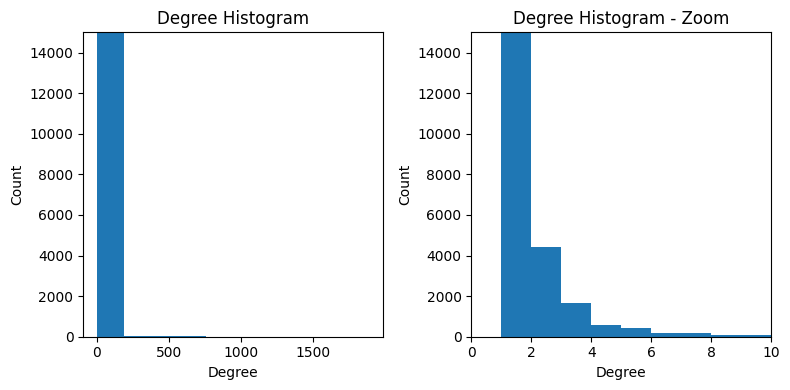

8092 nodes, 28167 edges
Nodes removed: 75.17%
Edges removed: 40.57%
Edges per nodes: 4.03
65 Ign
61 Eurogamer
61 Wayback Machine
59 Gamespot
57 Issn (Identifier)
55 Polygon (Website)
53 Video Game
49 Pc Gamer
45 Kotaku
42 S2Cid (Identifier)
42 Metacritic
40 Game Informer
37 Vg247
36 Gamasutra
35 Pcgamesn
35 Video Game Developer
35 Video Game Console
35 Xbox One
35 Gamesindustry.Biz
34 Video Game Publisher
33 Video Game Genre
33 Video-Game Industry
33 Ars Technica
32 The New York Times
32 The Guardian
31 Microsoft Windows
31 Oclc (Identifier)
31 Destructoid
30 Playstation 5
29 Playstation 4
29 Nintendo Switch
29 Nintendo
29 Engadget
28 Edge (Magazine)
27 The Verge
27 Game Engine
26 Android (Operating System)
26 Video Game Journalism
26 Gamesradar+
26 Computing Platform
26 Downloadable Content
25 Rock, Paper, Shotgun
25 Electronic Arts
25 Variety (Magazine)
24 Shacknews
24 Giant Bomb
24 Famitsu
23 Cloud Gaming
23 Gamepro
23 Twitter
23 United States
23 Ios
23 Microsoft
23 Xbox 360
23 Pers

In [14]:
plt.style.use("default")
# degree sequence
degree_sequence = sorted([d for n, d in composeAll.degree()], reverse=True)

fig, ax = plt.subplots(1,2,figsize=(8,4))

# all_data has information about degree_sequence and the width of each bin
ax[0].hist(degree_sequence)
ax[1].hist(degree_sequence,bins=[1,2,3,4,5,6,7,8,9,10])

ax[0].set_title("Degree Histogram")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Degree")
ax[0].set_ylim(0,15000)

ax[1].set_title("Degree Histogram - Zoom")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Degree")
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,15000)

plt.tight_layout()
plt.show()
     

# filter nodes with degree greater than or equal to 2
core = [node for node, deg in dict(composeAll.degree()).items() if deg >= 2]

# select a subgraph with 'core' nodes
gsub = nx.subgraph(composeAll, core)

print("{} nodes, {} edges".format(len(gsub), nx.number_of_edges(gsub)))

nx.write_graphml(gsub, "cna.graphml")
     

print("Nodes removed: {:.2f}%".format(100*(1 - 3420/13775)))
print("Edges removed: {:.2f}%".format(100*(1 - 14771/24856)))
print("Edges per nodes: {:.2f}".format(13775/3420))

top_indegree = sorted(dict(gsub.in_degree()).items(),
                      reverse=True, key=itemgetter(1))[:100]
print("\n".join(map(lambda t: "{} {}".format(*reversed(t)), top_indegree)))